In [4]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet

In [5]:
# essential libraries
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()

    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)

    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)))

In [8]:
from pathlib import Path
file_path = Path('abstracts.txt')
file_content = file_path.read_text()
clean_text = clean(file_content)
print(file_content)

Assessing Semiregional Cerebral Oxygen Consumption (CMRO2) in Preterm Neonates: A Quantitative MRI Cohort Study With Exploratory Analysis of Respiratory Support
Developing a noninvasive method for measuring oxygen consumption at both
regional and whole-brain levels in preterm infants is crucial for assessing
brain development and neuronal injury in this vulnerable population. This study
presents a multi-modal MRI technique and analysis pipeline that produces
whole-brain semiregional maps—with the potential to be fully regional—which we
employ in a cohort study to investigate how the duration of various respiratory
supports in very preterm infants affects CBF and the cerebral metabolic rate of
oxygen (CMRO2). Infants (n = 19) born < 32 weeks gestational age were recruited
in the neonatal intensive care unit. Infants were scanned at term-equivalent
age using a 3 T MRI sequence comprising T1-weighted, T2-weighted, arterial spin
labeling (ASL), and SWI. Days on three different categories o

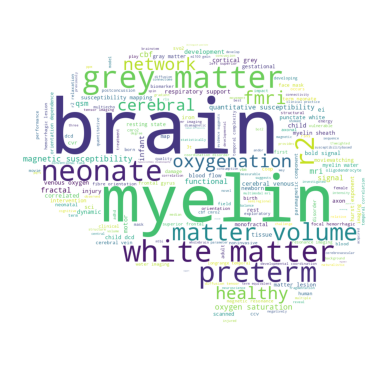

In [23]:
brain_mask = np.array(Image.open('brain.png'))
brain_mask[brain_mask != 0] = 255
brain_mask = 255 - brain_mask
stop_words = ["et", "al", "p", "c", "using", "wa", "crossref", "medline", "subject", "j", "group", "finding", "ca", "value",
              "b","may", "n", "v", "ss", "h", "found", "suggest", "age", "difference", "different", "increased", "suggest", 
              "study", "change", "data", "analysis", "sd", "measure", "significantly", "significant", "result", "id", "set", 
              "present", "image", "male", "ha", "week", "current", "mean", "3ply", "respectively", "due", "whether", "guideline", 
              "compared", "investigate", "time", "conclusion", "scan", "region", "level", "td", "control", "total", "literature", 
              "day", "total", "show", "eight", "use", "small", "higher", "effect", "lower", "increase", "used", "lead", "five", "size",
              "expected", "altered", "however", "potential", "previous", "year", "either", "association", "review", "greater grey",
              "future", "participant", "measuring", "measured", "r", "rate", "becomes", "condition", "greater", "assessed", "future", "tea",
              "one", "associated", "role", "cohort", "research", "various", "often", "across", "application", "serve", "linear", "consistent",
              "include", "decreased", "provide", "shown", "second", "wearing", "kn95", "method", "examined", "later", "well", "known",
              "examined", "examine", "characteristic", "received", "score", "regression", "linked", "recruited", "pattern", "purpose", 
              "insight", "relationship", "shortly", "estimate", "part", "within", "little", "like", "work", "average", "underwent",
              "included", "yet", "outcome", "period", "related", "reflect", "technique", "following", "occur", "determine", "evidence suggests",
              "along"
             ]
wc = WordCloud(background_color= '#FFFFFF', contour_color= '#FFFFFF', width = 800, height = 500, mask = brain_mask, stopwords=stop_words, random_state=123).generate(clean_text)
plt.axis("off")
plt.imshow(wc)
plt.savefig('wordcloud_2025.png', bbox_inches='tight', dpi=300)